Apagar depois, link aula:
https://ironhack.zoom.us/j/956751971?pwd=RzFZelF3YVhHL3MxYXlqMFdnUGFwdz09

# PetFinder.my Adoption Prediction - Baseline

Dataset Souce: https://www.kaggle.com/c/petfinder-adoption-prediction/data

## Setup

### Import libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Import Dataset

#### Train

In [17]:
#Import train dataset
df = pd.read_csv('../final_dataset/train.csv')

#Import test dataset
df_ong = pd.read_csv('../final_dataset/test.csv')

#Display all columns
pd.set_option('display.max_columns', None)

#Check the first lines
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,NonAdopted,Fee_y
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0,0
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0,1
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0,0


#### Create a Backup 

In [18]:
#Create a backup
df_bkup = df.copy()

## Exploratory Analysis Data

### Variables Description

Understanding dataset:
- Type: Tipo do animal 1= dog, 2=cat
- Age - Age of pet when listed, in months
- Breed1 - raça `BreedLabels.csv`
- Breed2 - segunda raça se o cão for misturado - `BreedLabels.csv`
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary) `ColorLabels.csv`
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary) `ColorLabels.csv`
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary) `ColorLabels.csv`
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure) - vermifugado
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- **Quantity - Number of pets represented in profile**
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary) - `StateLabels.csv`
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.


TARGET:<br>
**AdoptionSpeed:**<br>
0 - Pet was adopted on the same day as it was listed. <br>
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.<br>
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.<br>
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.<br>
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [19]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           11565 non-null  int64  
 1   Name           10885 non-null  object 
 2   Age            11565 non-null  int64  
 3   Breed1         11565 non-null  int64  
 4   Breed2         11565 non-null  int64  
 5   Gender         11565 non-null  int64  
 6   Color1         11565 non-null  int64  
 7   Color2         11565 non-null  int64  
 8   Color3         11565 non-null  int64  
 9   MaturitySize   11565 non-null  int64  
 10  FurLength      11565 non-null  int64  
 11  Vaccinated     11565 non-null  int64  
 12  Dewormed       11565 non-null  int64  
 13  Sterilized     11565 non-null  int64  
 14  Health         11565 non-null  int64  
 15  Quantity       11565 non-null  int64  
 16  Fee            11565 non-null  int64  
 17  State          11565 non-null  int64  
 18  Rescue

In [20]:
#Check main infos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,11565.0,1.427410,0.494724,1.0,1.0,1.0,2.0,2.0
Age,11565.0,11.783831,19.361008,0.0,2.0,4.0,12.0,255.0
Breed1,11565.0,262.460960,63.718124,0.0,265.0,266.0,307.0,307.0
Breed2,11565.0,68.901167,120.059559,0.0,0.0,0.0,103.0,307.0
Gender,11565.0,1.560138,0.496392,1.0,1.0,2.0,2.0,2.0
Color1,11565.0,2.354259,1.801639,1.0,1.0,2.0,3.0,7.0
Color2,11565.0,3.142153,2.854271,0.0,0.0,2.0,7.0,7.0
Color3,11565.0,1.406658,2.705326,0.0,0.0,0.0,0.0,7.0
MaturitySize,11565.0,1.880415,0.547597,1.0,2.0,2.0,2.0,4.0
FurLength,11565.0,1.483441,0.610787,1.0,1.0,1.0,2.0,3.0


> Insights:
- Só há linhas nulas na coluna Name e Description;

### Target Enconder

Encoder categorical variables:

- `Type` → `Type_E Dog or Cat
- `Breed1` → `Breed1_E` Raça
- `Breed2` → `Breed2_E` Segunda raça se o cão for misturado 
- `Gender` → `Gender_E` Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- `Color1` → `Color1_E` Color 1 of pet (Refer to ColorLabels dictionary) ColorLabels.csv
- `Color2` → `Color 2_E` of pet (Refer to ColorLabels dictionary) ColorLabels.csv
- `Color3` → `Color 3_E` of pet (Refer to ColorLabels dictionary) ColorLabels.csv
- `MaturitySize` → `MaturitySize_E`Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- `FurLength` → `FurLength_E`Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- `Vaccinated` → `Vaccinated`Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- `Dewormed` → `Dewormed_E`Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure) - vermifugado
- `Sterilized` → `Sterilized_E`Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- `Health` → `Health_E`Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- `Fee_y` →  `Fee_y_E` (column created)
- `State` → `State`

#### Train

In [21]:
from category_encoders import TargetEncoder
encoder = TargetEncoder(smoothing=0,cols=['Type','Breed1','Breed2','Gender','Color1','Color2','Color3','MaturitySize','FurLength',
                                          'Vaccinated','Dewormed','Sterilized','Health','Fee_y','State'])
df[['Type_E','Breed1_E','Breed2_E','Gender_E','Color1_E','Color2_E','Color3_E','MaturitySize_E','FurLength_E','Vaccinated_E','Dewormed_E',
    'Sterilized_E','Health_E','Fee_y_E','State_E']] = encoder.fit_transform(df[['Type','Breed1','Breed2','Gender','Color1','Color2','Color3',
                                                               'MaturitySize','FurLength','Vaccinated','Dewormed',
                                                                'Sterilized','Health','Fee_y','State']], y=df['NonAdopted'])
df.columns

c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'NonAdopted', 'Fee_y', 'Type_E', 'Breed1_E', 'Breed2_E', 'Gender_E',
       'Color1_E', 'Color2_E', 'Color3_E', 'MaturitySize_E', 'FurLength_E',
       'Vaccinated_E', 'Dewormed_E', 'Sterilized_E', 'Health_E', 'Fee_y_E',
       'State_E'],
      dtype='object')

## Logistic Regression Baseline

**Objective:**<br>

Predict the target `Non Adopted`:
- P(Non Adopted) = 1 (not adopted)
- P(Non Adopted) = 0 (adopted)

In [22]:
# Column names:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'NonAdopted', 'Fee_y', 'Type_E', 'Breed1_E', 'Breed2_E', 'Gender_E',
       'Color1_E', 'Color2_E', 'Color3_E', 'MaturitySize_E', 'FurLength_E',
       'Vaccinated_E', 'Dewormed_E', 'Sterilized_E', 'Health_E', 'Fee_y_E',
       'State_E'],
      dtype='object')

 **Premisse:** <br>I'm not considering: <br>
 'Name';
 **'Description'**;
 'PetID';
 **'PhotoAmt'**;
 'AdoptionSpeed';
 'NonAdopted'

### Defining Variables

#### Train

In [23]:
#Defining Variables - Train
    
X_train = df[['Type_E', 'Age', 'Breed1_E', 'Breed2_E', 'Gender_E', 'Color1_E', 'Color2_E',
           'Color3_E', 'MaturitySize_E', 'FurLength_E', 'Vaccinated_E', 'Dewormed_E',
           'Sterilized_E', 'Health_E', 'Quantity', 'Fee_y_E', 'State_E']]

#Removed: 'Name','Description','PetID', 'PhotoAmt', 'AdoptionSpeed','NonAdopted'

y_train = df['NonAdopted']

# Instance the class
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_train)

# Standardize the train variables
X_train_std = scaler.transform(X_train)


# Instance the model
logistic = LogisticRegression(max_iter=1000)

# Train the model
logistic.fit(X_train_std, y_train)

#Coeficiente
logistic.coef_

# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,Breed1_E,0.594943
1,Sterilized_E,0.406490
2,Age,0.277189
3,Breed2_E,0.218963
4,State_E,0.208182
5,Fee_y_E,0.135744
6,Vaccinated_E,0.119060
7,FurLength_E,0.107905
8,Health_E,0.096302
9,Color2_E,0.094358


### Standardization

In [24]:
# Instance the class
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_train)

# Standardize the train variables
X_train_std = scaler.transform(X_train)


In [25]:
# Instance the model
logistic = LogisticRegression(max_iter=1000)

# Train the model
logistic.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

### Coeficients

In [26]:
#Coeficiente
logistic.coef_

# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,Breed1_E,0.594943
1,Sterilized_E,0.406490
2,Age,0.277189
3,Breed2_E,0.218963
4,State_E,0.208182
5,Fee_y_E,0.135744
6,Vaccinated_E,0.119060
7,FurLength_E,0.107905
8,Health_E,0.096302
9,Color2_E,0.094358


In [27]:
# Instance the model
logistic_l1 = LogisticRegression(penalty='l1', C=0.01, solver='saga')

# Train the model
logistic_l1.fit(X_train_std, y_train)

#Coeficiente
logistic_l1.coef_

# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic_l1.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,Breed1_E,0.487890
1,Sterilized_E,0.387027
2,Age,0.199710
3,State_E,0.164959
4,Breed2_E,0.157198
5,Fee_y_E,0.076352
6,FurLength_E,0.054156
7,Health_E,0.045926
8,Color2_E,0.035848
9,Vaccinated_E,0.028006


Analysis:
- Se for positivo, aumenta a probabilidade de *não ser adotado*;
- Se for negativo, aumenta a probabilidade de *ser adotado*;

Insights:<br>
The main factor which contribute to non adoption is the breed1.
Three main factors:<br>
- Breed1_E	0.487890
- Sterilized_E	0.387027
- Age	0.199710
- State_E 0.164959

### AUC Score

In [28]:
from sklearn.metrics import roc_auc_score

#Train e Test - comparar
roc_auc_score(y_train, logistic.predict_proba(X_train_std)[:, 1])

0.7211237171785199

### Prediction

In [29]:
#Predict only for NonAdopted = 1
#X_train_one = X_train.iloc[y_train[y_train==1].index,:]

# Instance the class
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_train)

# Standardize the variables
X_train_std = scaler.transform(X_train)

In [30]:
logistic.predict_proba(X_train_std)

array([[0.81081885, 0.18918115],
       [0.72257321, 0.27742679],
       [0.80889182, 0.19110818],
       ...,
       [0.93875386, 0.06124614],
       [0.58136959, 0.41863041],
       [0.66153165, 0.33846835]])

In [31]:
#logistic.predict_proba(X_test_std)

## Tree

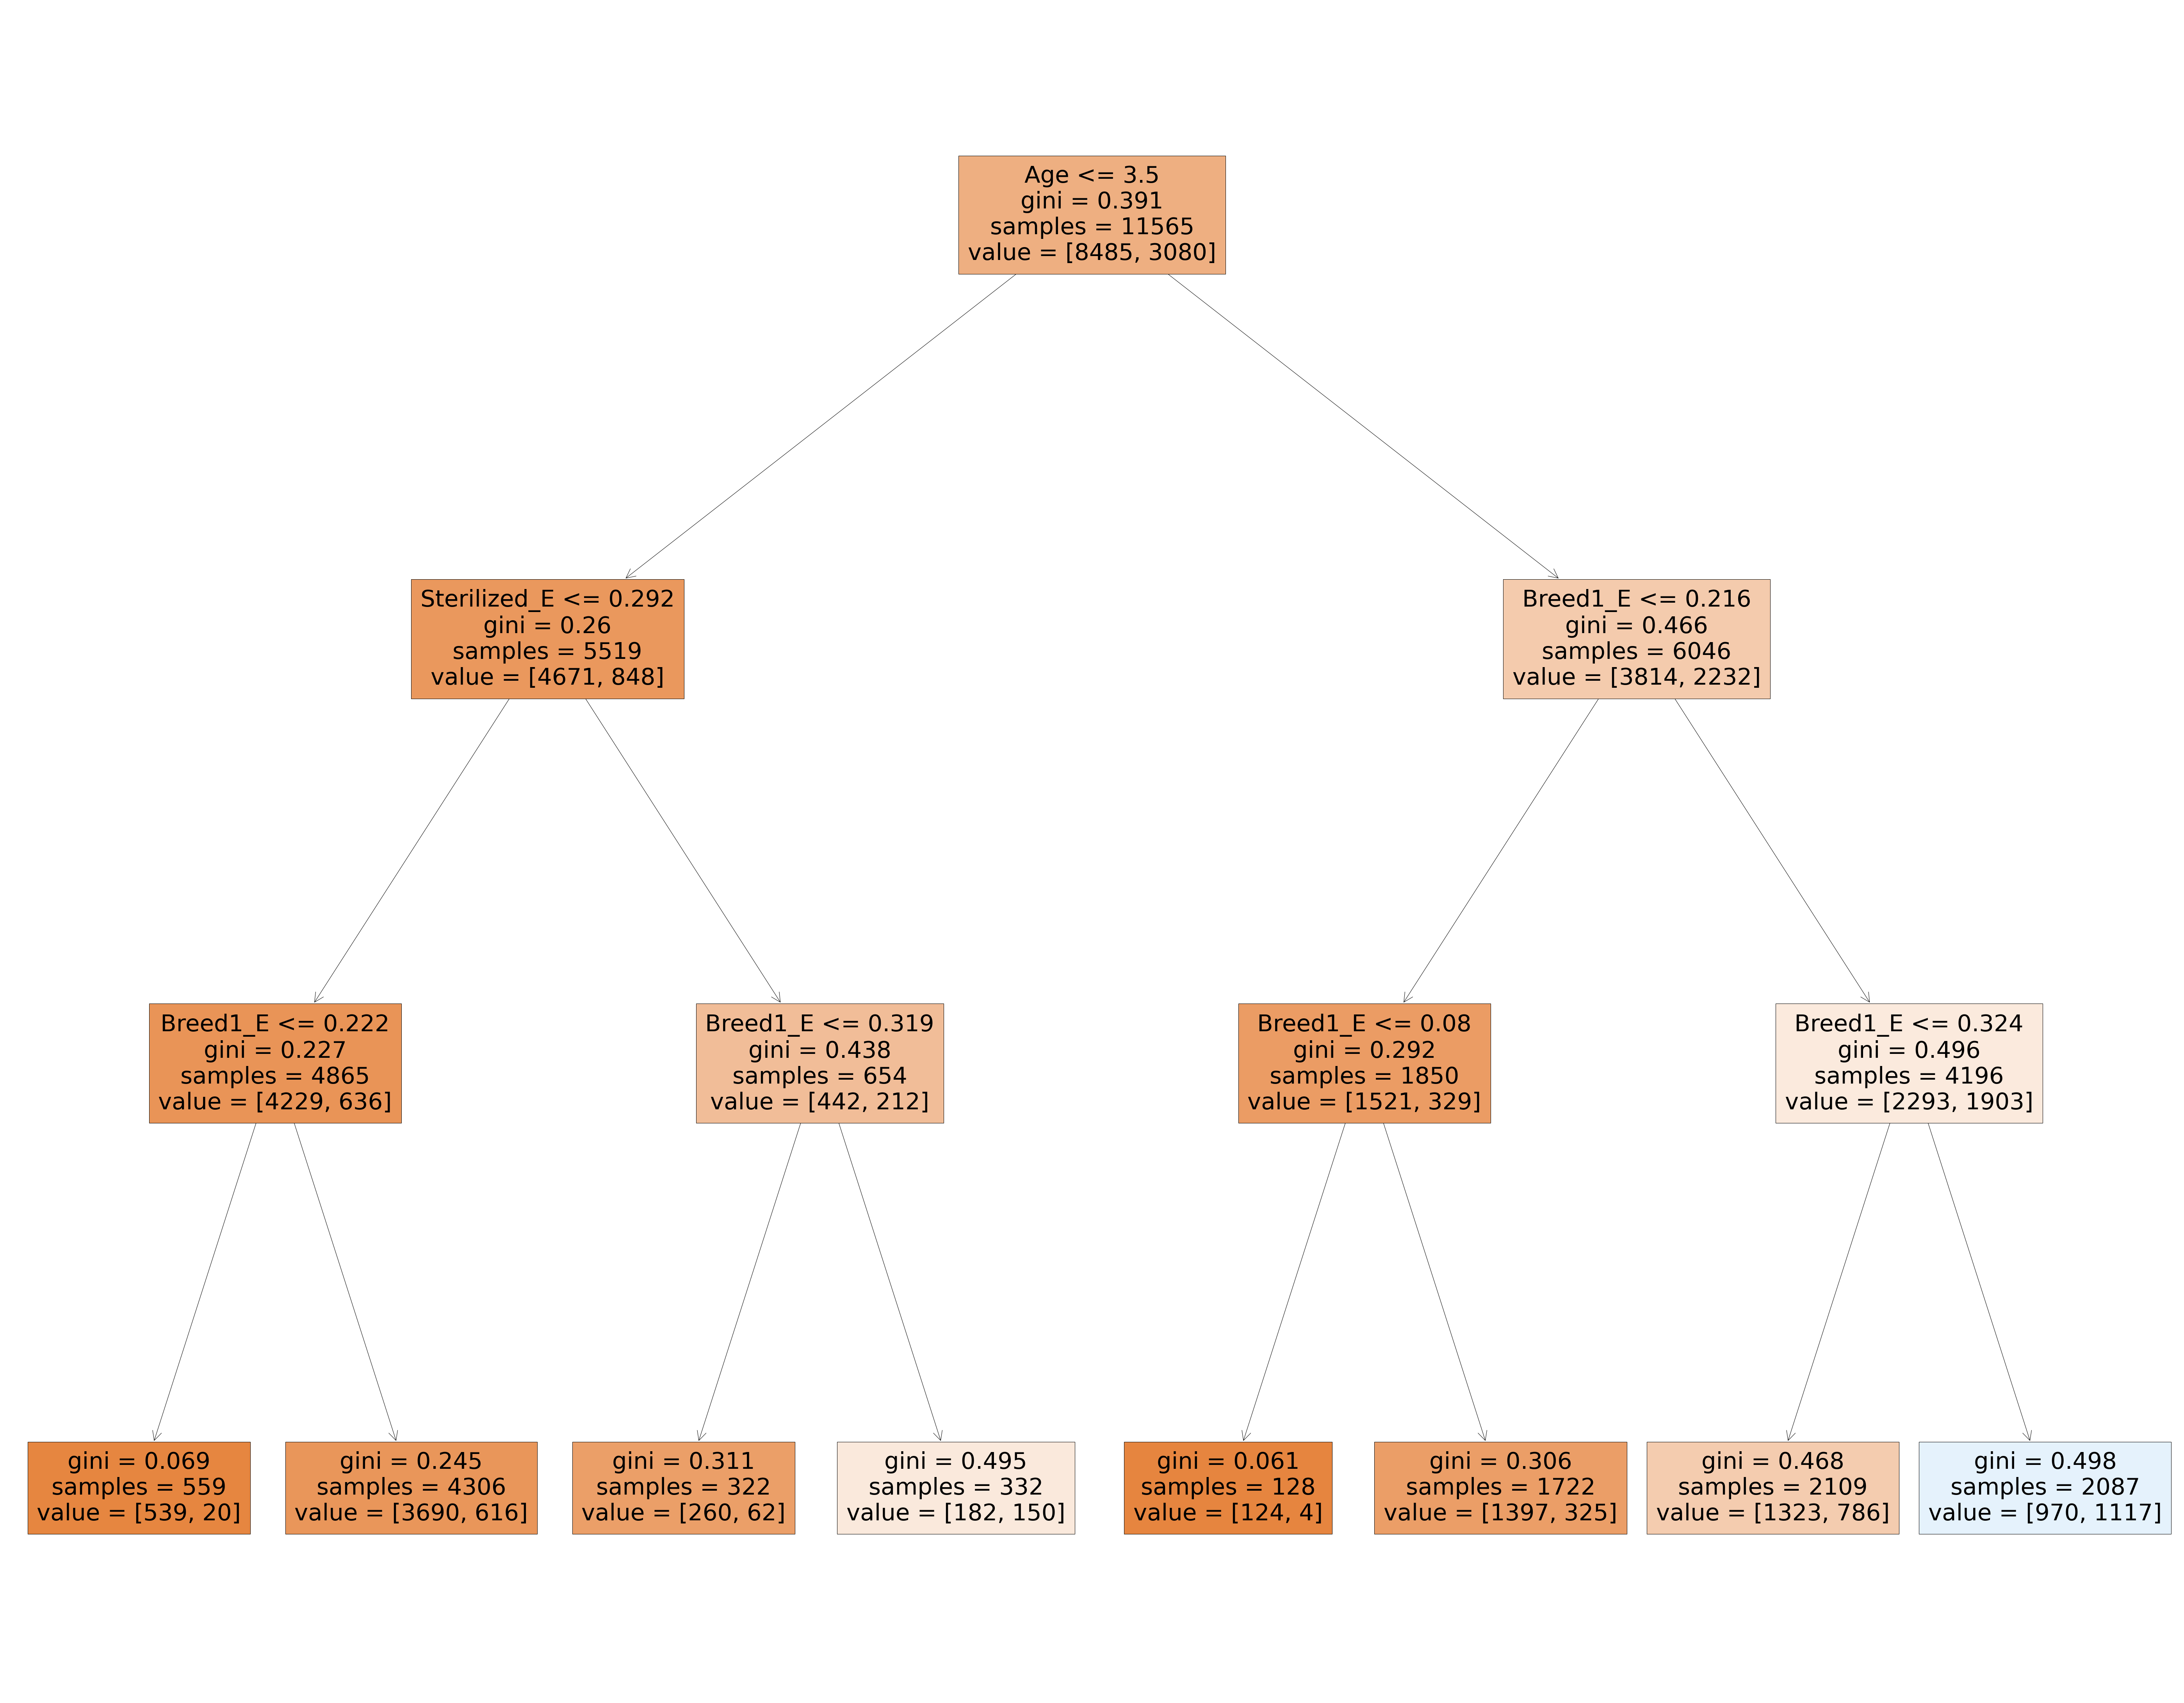

In [32]:
# Instance the model
tree_baseline = DecisionTreeClassifier(max_depth=3)

# Train the model
tree_baseline.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(100,80))
plot_tree(decision_tree=tree_baseline, feature_names=X_train.columns, filled=True);

In [33]:
#logistic.predict_proba(X_test_std)

The most influent features are:

- Age
- Sterelized_E
- Breed1

## Feature Selection

### Yellow Brick

In [44]:
X_train

,Type_E,Age,Breed1_E,Breed2_E,Gender_E,Color1_E,Color2_E,Color3_E,MaturitySize_E,FurLength_E,Vaccinated_E,Dewormed_E,Sterilized_E,Health_E,Quantity,Fee_y_E,State_E
0,0.245195,3,0.262295,0.280061,0.245724,0.264398,0.245470,0.266918,0.237903,0.285778,0.206487,0.233225,0.195872,0.26207,1,0.295582,0.235991
1,0.245195,1,0.226590,0.280061,0.245724,0.264398,0.256098,0.266918,0.274451,0.253541,0.310072,0.321605,0.388559,0.26207,1,0.260317,0.297233
2,0.282090,1,0.329590,0.280061,0.245724,0.288174,0.245470,0.266918,0.274451,0.253541,0.311688,0.269579,0.195872,0.26207,1,0.260317,0.235991
3,0.282090,4,0.329590,0.280061,0.282495,0.264398,0.256098,0.266918,0.274451,0.285778,0.311688,0.269579,0.195872,0.26207,1,0.295582,0.297233
4,0.282090,1,0.329590,0.280061,0.245724,0.264398,0.291352,0.266918,0.274451,0.285778,0.206487,0.233225,0.195872,0.26207,1,0.260317,0.235991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,0.282090,24,0.149068,0.263878,0.245724,0.288174,0.278017,0.260171,0.274451,0.253541,0.310072,0.321605,0.195872,0.26207,1,0.260317,0.235991
11561,0.245195,1,0.258151,0.280061,0.282495,0.220627,0.236364,0.260171,0.274451,0.285778,0.206487,0.269579,0.195872,0.26207,1,0.260317,0.297233
11562,0.282090,6,0.166667,0.280061,0.282495,0.264398,0.245470,0.266918,0.237903,0.158485,0.311688,0.269579,0.195872,0.26207,1,0.260317,0.297233
11563,0.245195,9,0.258151,0.280061,0.282495,0.300000,0.245470,0.266918,0.237903,0.285778,0.311688,0.269579,0.400886,0.26207,1,0.260317,0.270195


In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

#Standard X_train
X_train_std = scaler.transform(X_train)

c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


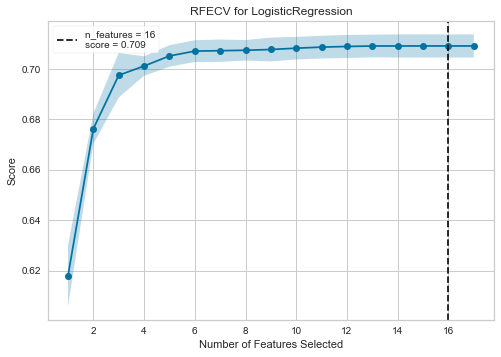

<AxesSubplot:title={'center':'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [45]:
#Recursive Feature Elimination in Yellowbricks

from yellowbrick.features import RFECV
model = LogisticRegression(penalty='l1', C=0.01, solver='saga')

visualizer = RFECV(model, scoring='roc_auc')

visualizer.fit(X_train_std, y_train)        
visualizer.show()

In [46]:
visualizer.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [47]:
X_train.columns[visualizer.ranking_ == 1 ]

Index(['Type_E', 'Age', 'Breed1_E', 'Breed2_E', 'Gender_E', 'Color1_E',
       'Color2_E', 'Color3_E', 'MaturitySize_E', 'FurLength_E', 'Vaccinated_E',
       'Dewormed_E', 'Sterilized_E', 'Health_E', 'Fee_y_E', 'State_E'],
      dtype='object')

# Final Version - Baseline

The final version is defined removing 'Age' column.

In [53]:
#Defining Variables - Train
    
X_train = df[['Type_E', 'Age', 'Breed1_E', 'Breed2_E', 'Gender_E', 'Color1_E',
       'Color2_E', 'Color3_E', 'MaturitySize_E', 'FurLength_E', 'Vaccinated_E',
       'Dewormed_E', 'Sterilized_E', 'Health_E', 'Fee_y_E', 'State_E']]

#Removed: 'Name','Description','PetID', 'PhotoAmt', 'AdoptionSpeed','NonAdopted', 'Quantity'

y_train = df['NonAdopted']

# Instance the class
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_train)

# Standardize the train variables
X_train_std = scaler.transform(X_train)


# Instance the model
logistic = LogisticRegression(penalty='l1', C=0.01, solver='saga')

# Train the model
logistic.fit(X_train_std, y_train)

#Coeficiente
logistic.coef_

array([[-0.04909308,  0.19970188,  0.48789416,  0.1572096 ,  0.01407657,
         0.02279373,  0.03584343,  0.02460879,  0.00858454,  0.05415089,
         0.02800712,  0.        ,  0.38702524,  0.0459225 ,  0.07635067,
         0.16496243]])

In [54]:
#Coeficiente
logistic.coef_

# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,Breed1_E,0.487894
1,Sterilized_E,0.387025
2,Age,0.199702
3,State_E,0.164962
4,Breed2_E,0.157210
5,Fee_y_E,0.076351
6,FurLength_E,0.054151
7,Health_E,0.045923
8,Color2_E,0.035843
9,Vaccinated_E,0.028007


In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, logistic.predict_proba(X_train_std)[:, 1])

0.7139643871155361

Pendente:
- Dividir df em **treino** e **teste** para checar o roc_auc_score;